<a href="https://colab.research.google.com/github/yucachen/MLTSA25_YChen/blob/main/In_Class_Code/class_3_11_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dfgrouped = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/bitcoin_volume.csv", index_col=0)

In [7]:
dfgrouped.head()

,Volume
Date,
2012-01-01,10.000000
2012-01-02,10.100000
2012-01-03,107.085281
2012-01-04,107.233260
2012-01-05,70.328742


In [8]:
dfgrouped.tail()

,Volume
Date,
2014-12-29,5317.387194
2014-12-30,7673.202917
2014-12-31,7567.614615
2015-01-01,4791.695273
2015-01-02,1651.384036


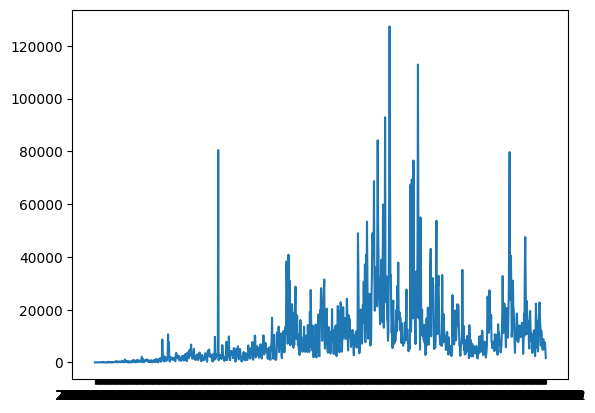

In [12]:
# dfgrouped.plot("Volume") # this doesn't work because the date is not actually a number

plt.plot(dfgrouped.index, dfgrouped["Volume"])

# currently, all the dates are being written down (doesn't recognize yet)

In [16]:
dfgrouped.index = pd.to_datetime(dfgrouped.index) # datatype that counts nanoseconds, relatively complex datatype in pandas ("one of best to use")

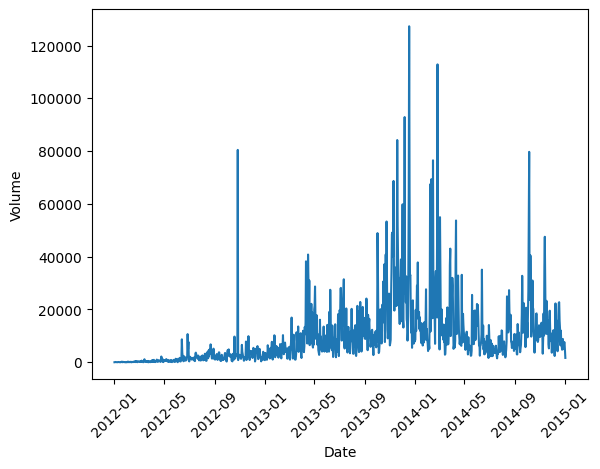

In [20]:
plt.plot(dfgrouped.index, dfgrouped["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45) # slightly tilts the dates so it's easier to read
plt.show()

In [23]:
dfshort = dfgrouped.iloc[200:500]

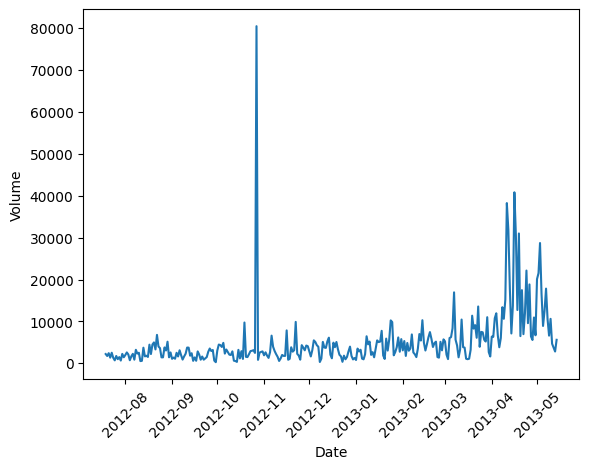

In [24]:
plt.plot(dfshort.index, dfshort["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45) # slightly tilts the dates so it's easier to read
plt.show()

In [33]:
rollingobject = dfshort.rolling(window = 20, center = True)

In [34]:
m = rollingobject.mean()
s = rollingobject.std()

<Axes: xlabel='Date'>

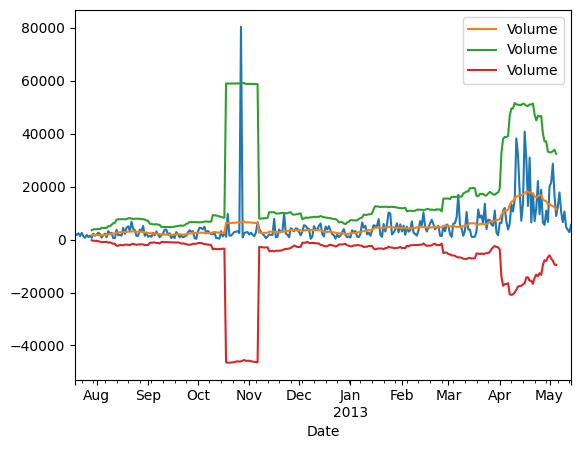

In [35]:
ax = dfshort["Volume"].plot() # more human readable way
m.plot(ax = ax)
(m + 3 * s).plot(ax = ax)
(m - 3 * s).plot(ax = ax)

In [39]:
import numpy as np
# m and s are dataframe things, so need to add ["Volume"] to it
np.where((dfshort["Volume"] < (m["Volume"] - 3 * s["Volume"])) + (dfshort["Volume"] > (m["Volume"] + 3 * s["Volume"]))) # + is or, * is and

(array([100, 231]),)

(array([], dtype=int64),)


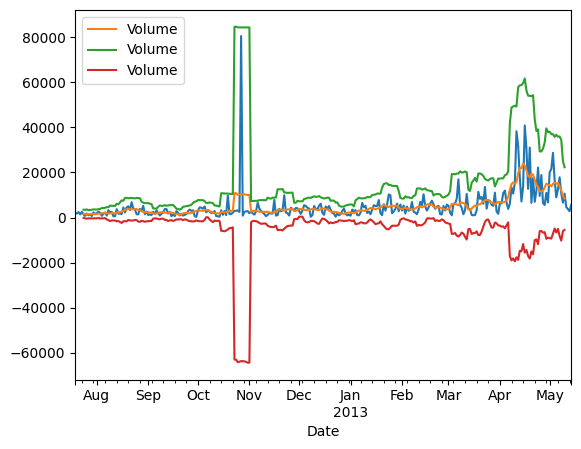

In [40]:
rollingobject = dfshort.rolling(window = 10, center = True)
m = rollingobject.mean()
s = rollingobject.std()
ax = dfshort["Volume"].plot() # more human readable way
m.plot(ax = ax)
(m + 3 * s).plot(ax = ax)
(m - 3 * s).plot(ax = ax)
print(np.where((dfshort["Volume"] < (m["Volume"] - 3 * s["Volume"])) + (dfshort["Volume"] > (m["Volume"] + 3 * s["Volume"])))) # + is or, * is and

# whether or not things are outliers DEPENDS on your window!!

In [47]:
m1 = dfshort["Volume"].rolling(window=21, center=True).apply(lambda x: np.mean( np.concatenate([x[:10], x[11:]]))  )
s1 = dfshort["Volume"].rolling(window=21, center=True).apply(lambda x: np.std( np.concatenate([x[:10], x[11:]]))  )
# lambda denotes function that is in a single line
# skipping the 10th point where the center is

<Axes: xlabel='Date'>

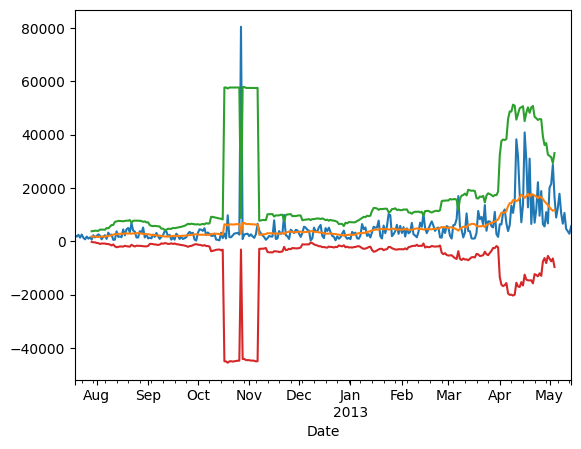

In [50]:
ax = dfshort["Volume"].plot()
m1.plot(ax = ax)
(m1 + 3 * s1).plot(ax = ax)
(m1 - 3 * s1).plot(ax = ax)
# print(np.where((dfshort["Volume"] < (m1["Volume"] - 3 * s1["Volume"])) + (dfshort["Volume"] > (m1["Volume"] + 3 * s1["Volume"])))) # + is or, * is and

# whether or not things are outliers DEPENDS on your window!!